In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
import catboost as cbt
from catboost import Pool, cv
import lightgbm as lgb
from lightgbm import LGBMRegressor
import numpy as np

In [14]:
df = pd.read_csv('bundles_1.csv', sep = ',').drop_duplicates()

null = df['name'].isnull()
# удаление строк с пустыми значениями
df = df[~null]
df.head()

,id,Работа с первичной документацией,Компьютерные программы для ведения бухгалтерского учета,(О) Ведение налогового учета,Принятие к учету первичных учетных документов о фактах хозяйственной жизни экономического субъекта,Проверка первичных учетных документов,(О) Архивирование документов,Организация и ведение документооборота,работа с кассовыми и банковскими документами,(О) Ведение и учет кассовых операций,Контроль и проверка кассовой дисциплины,(О) Работа кассиром,знание законодательства кассовых операций,Знание программ 1С,1С Инструменты,ведение и учет банковских операций,(О) Ведение управленческого учета,знание законодательства по бухгалтерскому учету,Знание Банк-клиент,Банк-клиент,Знание налогового законодательства,знание гражданского законодательства,Знание трудового законодательства,знание финансового законодательства,Знание налогового законодательства Республики Казахстан,знание таможенного законодательства,Знание бюджетного законодательства,знание валютного законодательства,Отслеживание изменений законодательства Республики Казахстан,Знание МСФО,Знание административного права,Знание нормативно-правовых актов,Знание законодательства в сфере ЖКХ,Знание законодательства пенсионной системы РФ,Знание основ и теории бухгалтерского учета,знание законодательства Республики Беларусь,(О) Ведение бухгалтерского учета,Ведение бухгалтерского учета нескольких юридических лиц (организаций),(О) Ведение бухгалтерского учета в бюджетной сфере,Ведение бухгалтерского и налогового учета ИП,Ведение бухгалтерского и налогового учета,(О) Контроль ведения бухгалтерского и налогового учета,Ведение бухгалтерского и налогового учета в строительной организации,знание работы с кассовым аппаратом,Работа с онлайн кассами,Составление отчетности по МСФО,Знание налогового учета,Ведение бухгалтерского и налогового учета УСН,Составление сводных учетных документов,знание и ведение бухгалтерского учета и налогообложения ВЭД,Подготовка и сдача бухгалтерской и налоговой отчетности,Итоговое обобщение фактов хозяйственной жизни,Денежное измерение объектов бухгалтерского учета,Составление и сдача налоговых деклараций,"Составление отчетных калькуляций, калькуляций себестоимости продукции (работ, услуг)",Оформление таможенных документов,Ведение синтетического и аналитического учета,Контроль дебиторской и кредиторской задолженности,Сверка с поставщиками,Ведение бухгалтерского учета имущества,"расчет налогов, страховых взносов",Отчетность в Пенсионный фонд России,Отчетность в ФСС РФ,Перечисление налогов и страховых взносов,Учет заработной платы,Оплата счетов,учет основных средств,Знание основных участков,Преимущества претендента на должность бухгалтер,Учетная политика организации,Проверка данных с использованием 1С,(О) Работать с программой 1С,аккуратность при работе с документами,ведение кадрового учета,Знание бухгалтерского бюджетного учета,Взаимодействие с ГВБФ РФ,Взаимодействие с налоговыми органами,(О) Взаимодействие с контролирующими органами,(О) Взаимодействие с банками,(О) Взаимодействие с контрагентами,Взаимодействие с аудиторами,Взаимодействие с поставщиками,Учет расчетов по оплате труда,Удалить работать с большим объемом информации,Учет расчетов с контрагентами,учет товарно-материальных ценностей,(О) Проведение инвентаризации,ведение бухгалтерского учета в торговле,знание 1С торговля,знание специфики ведения учета торговли,Контроль за учетом имущества и обязательств,Контроль учета и ведения реестра федерального имущества,Учет расчетов с поставщиками,пользователь программы 1 С ЗУП,знание работы с компьютером,Знание всех участков бухгалтерского учета,знание первичной бухгалтерской документации,знание бухгалтерской и налоговой отчетности,оформление первичной документации,Учет ТМЦ,Знание учета ТМЦ,Контроль учета ТМЦ,Формирование первичной документации по учету ТМЦ,Отражение в бухгалтерском учете результатов переоценки объектов,Представление бухгалтерской отчетности в уполномоченные органы,Формирование и оформление актов сверок,Выполнение поручений,Осуществлени

In [15]:
pd.options.display.max_columns = None
zero_cols = df.columns[(df == 0).all()]

# удаляем найденные столбцы
df.drop(zero_cols, axis=1, inplace=True)

df.dropna(subset=['salary_from_rub', 'salary_to_rub'], how='all', inplace=True)

df.head()

,id,Работа с первичной документацией,Компьютерные программы для ведения бухгалтерского учета,(О) Ведение налогового учета,Принятие к учету первичных учетных документов о фактах хозяйственной жизни экономического субъекта,Проверка первичных учетных документов,(О) Архивирование документов,Организация и ведение документооборота,работа с кассовыми и банковскими документами,(О) Ведение и учет кассовых операций,Контроль и проверка кассовой дисциплины,(О) Работа кассиром,знание законодательства кассовых операций,Знание программ 1С,1С Инструменты,ведение и учет банковских операций,(О) Ведение управленческого учета,знание законодательства по бухгалтерскому учету,Знание Банк-клиент,Банк-клиент,Знание налогового законодательства,знание гражданского законодательства,Знание трудового законодательства,знание финансового законодательства,Знание налогового законодательства Республики Казахстан,знание таможенного законодательства,Знание бюджетного законодательства,знание валютного законодательства,Отслеживание изменений законодательства Республики Казахстан,Знание МСФО,Знание административного права,Знание нормативно-правовых актов,Знание законодательства в сфере ЖКХ,Знание законодательства пенсионной системы РФ,Знание основ и теории бухгалтерского учета,знание законодательства Республики Беларусь,(О) Ведение бухгалтерского учета,Ведение бухгалтерского учета нескольких юридических лиц (организаций),(О) Ведение бухгалтерского учета в бюджетной сфере,Ведение бухгалтерского и налогового учета ИП,Ведение бухгалтерского и налогового учета,(О) Контроль ведения бухгалтерского и налогового учета,Ведение бухгалтерского и налогового учета в строительной организации,знание работы с кассовым аппаратом,Работа с онлайн кассами,Составление отчетности по МСФО,Знание налогового учета,Ведение бухгалтерского и налогового учета УСН,Составление сводных учетных документов,знание и ведение бухгалтерского учета и налогообложения ВЭД,Подготовка и сдача бухгалтерской и налоговой отчетности,Итоговое обобщение фактов хозяйственной жизни,Денежное измерение объектов бухгалтерского учета,Составление и сдача налоговых деклараций,"Составление отчетных калькуляций, калькуляций себестоимости продукции (работ, услуг)",Оформление таможенных документов,Ведение синтетического и аналитического учета,Контроль дебиторской и кредиторской задолженности,Сверка с поставщиками,Ведение бухгалтерского учета имущества,"расчет налогов, страховых взносов",Отчетность в Пенсионный фонд России,Отчетность в ФСС РФ,Перечисление налогов и страховых взносов,Учет заработной платы,Оплата счетов,учет основных средств,Знание основных участков,Преимущества претендента на должность бухгалтер,Учетная политика организации,Проверка данных с использованием 1С,(О) Работать с программой 1С,аккуратность при работе с документами,ведение кадрового учета,Знание бухгалтерского бюджетного учета,Взаимодействие с ГВБФ РФ,Взаимодействие с налоговыми органами,(О) Взаимодействие с контролирующими органами,(О) Взаимодействие с банками,(О) Взаимодействие с контрагентами,Взаимодействие с аудиторами,Взаимодействие с поставщиками,Учет расчетов по оплате труда,Удалить работать с большим объемом информации,Учет расчетов с контрагентами,учет товарно-материальных ценностей,(О) Проведение инвентаризации,ведение бухгалтерского учета в торговле,знание 1С торговля,знание специфики ведения учета торговли,Контроль за учетом имущества и обязательств,Контроль учета и ведения реестра федерального имущества,Учет расчетов с поставщиками,пользователь программы 1 С ЗУП,знание работы с компьютером,Знание всех участков бухгалтерского учета,знание первичной бухгалтерской документации,знание бухгалтерской и налоговой отчетности,оформление первичной документации,Учет ТМЦ,Знание учета ТМЦ,Контроль учета ТМЦ,Формирование первичной документации по учету ТМЦ,Отражение в бухгалтерском учете результатов переоценки объектов,Представление бухгалтерской отчетности в уполномоченные органы,Формирование и оформление актов сверок,Выполнение поручений,Осуществлени

In [16]:
df = df[(df['salary_from_rub'] <= 300000) & (df['salary_from_rub'] >= 14000)]
df = df[(df['salary_to_rub'] <= 300000) & (df['salary_to_rub'] >= 14000)]

df.head()

,id,Работа с первичной документацией,Компьютерные программы для ведения бухгалтерского учета,(О) Ведение налогового учета,Принятие к учету первичных учетных документов о фактах хозяйственной жизни экономического субъекта,Проверка первичных учетных документов,(О) Архивирование документов,Организация и ведение документооборота,работа с кассовыми и банковскими документами,(О) Ведение и учет кассовых операций,Контроль и проверка кассовой дисциплины,(О) Работа кассиром,знание законодательства кассовых операций,Знание программ 1С,1С Инструменты,ведение и учет банковских операций,(О) Ведение управленческого учета,знание законодательства по бухгалтерскому учету,Знание Банк-клиент,Банк-клиент,Знание налогового законодательства,знание гражданского законодательства,Знание трудового законодательства,знание финансового законодательства,Знание налогового законодательства Республики Казахстан,знание таможенного законодательства,Знание бюджетного законодательства,знание валютного законодательства,Отслеживание изменений законодательства Республики Казахстан,Знание МСФО,Знание административного права,Знание нормативно-правовых актов,Знание законодательства в сфере ЖКХ,Знание законодательства пенсионной системы РФ,Знание основ и теории бухгалтерского учета,знание законодательства Республики Беларусь,(О) Ведение бухгалтерского учета,Ведение бухгалтерского учета нескольких юридических лиц (организаций),(О) Ведение бухгалтерского учета в бюджетной сфере,Ведение бухгалтерского и налогового учета ИП,Ведение бухгалтерского и налогового учета,(О) Контроль ведения бухгалтерского и налогового учета,Ведение бухгалтерского и налогового учета в строительной организации,знание работы с кассовым аппаратом,Работа с онлайн кассами,Составление отчетности по МСФО,Знание налогового учета,Ведение бухгалтерского и налогового учета УСН,Составление сводных учетных документов,знание и ведение бухгалтерского учета и налогообложения ВЭД,Подготовка и сдача бухгалтерской и налоговой отчетности,Итоговое обобщение фактов хозяйственной жизни,Денежное измерение объектов бухгалтерского учета,Составление и сдача налоговых деклараций,"Составление отчетных калькуляций, калькуляций себестоимости продукции (работ, услуг)",Оформление таможенных документов,Ведение синтетического и аналитического учета,Контроль дебиторской и кредиторской задолженности,Сверка с поставщиками,Ведение бухгалтерского учета имущества,"расчет налогов, страховых взносов",Отчетность в Пенсионный фонд России,Отчетность в ФСС РФ,Перечисление налогов и страховых взносов,Учет заработной платы,Оплата счетов,учет основных средств,Знание основных участков,Преимущества претендента на должность бухгалтер,Учетная политика организации,Проверка данных с использованием 1С,(О) Работать с программой 1С,аккуратность при работе с документами,ведение кадрового учета,Знание бухгалтерского бюджетного учета,Взаимодействие с ГВБФ РФ,Взаимодействие с налоговыми органами,(О) Взаимодействие с контролирующими органами,(О) Взаимодействие с банками,(О) Взаимодействие с контрагентами,Взаимодействие с аудиторами,Взаимодействие с поставщиками,Учет расчетов по оплате труда,Удалить работать с большим объемом информации,Учет расчетов с контрагентами,учет товарно-материальных ценностей,(О) Проведение инвентаризации,ведение бухгалтерского учета в торговле,знание 1С торговля,знание специфики ведения учета торговли,Контроль за учетом имущества и обязательств,Контроль учета и ведения реестра федерального имущества,Учет расчетов с поставщиками,пользователь программы 1 С ЗУП,знание работы с компьютером,Знание всех участков бухгалтерского учета,знание первичной бухгалтерской документации,знание бухгалтерской и налоговой отчетности,оформление первичной документации,Учет ТМЦ,Знание учета ТМЦ,Контроль учета ТМЦ,Формирование первичной документации по учету ТМЦ,Отражение в бухгалтерском учете результатов переоценки объектов,Представление бухгалтерской отчетности в уполномоченные органы,Формирование и оформление актов сверок,Выполнение поручений,Осуществлени

In [17]:
df['salary'] = (df['salary_from_rub'] + df['salary_to_rub']) / 2
df.loc[df['salary'].isnull(), 'salary'] = df.loc[df['salary'].isnull(), ['salary_from_rub', 'salary_to_rub']].apply(lambda x: x.dropna().iloc[0], axis=1)
df.head()

,id,Работа с первичной документацией,Компьютерные программы для ведения бухгалтерского учета,(О) Ведение налогового учета,Принятие к учету первичных учетных документов о фактах хозяйственной жизни экономического субъекта,Проверка первичных учетных документов,(О) Архивирование документов,Организация и ведение документооборота,работа с кассовыми и банковскими документами,(О) Ведение и учет кассовых операций,Контроль и проверка кассовой дисциплины,(О) Работа кассиром,знание законодательства кассовых операций,Знание программ 1С,1С Инструменты,ведение и учет банковских операций,(О) Ведение управленческого учета,знание законодательства по бухгалтерскому учету,Знание Банк-клиент,Банк-клиент,Знание налогового законодательства,знание гражданского законодательства,Знание трудового законодательства,знание финансового законодательства,Знание налогового законодательства Республики Казахстан,знание таможенного законодательства,Знание бюджетного законодательства,знание валютного законодательства,Отслеживание изменений законодательства Республики Казахстан,Знание МСФО,Знание административного права,Знание нормативно-правовых актов,Знание законодательства в сфере ЖКХ,Знание законодательства пенсионной системы РФ,Знание основ и теории бухгалтерского учета,знание законодательства Республики Беларусь,(О) Ведение бухгалтерского учета,Ведение бухгалтерского учета нескольких юридических лиц (организаций),(О) Ведение бухгалтерского учета в бюджетной сфере,Ведение бухгалтерского и налогового учета ИП,Ведение бухгалтерского и налогового учета,(О) Контроль ведения бухгалтерского и налогового учета,Ведение бухгалтерского и налогового учета в строительной организации,знание работы с кассовым аппаратом,Работа с онлайн кассами,Составление отчетности по МСФО,Знание налогового учета,Ведение бухгалтерского и налогового учета УСН,Составление сводных учетных документов,знание и ведение бухгалтерского учета и налогообложения ВЭД,Подготовка и сдача бухгалтерской и налоговой отчетности,Итоговое обобщение фактов хозяйственной жизни,Денежное измерение объектов бухгалтерского учета,Составление и сдача налоговых деклараций,"Составление отчетных калькуляций, калькуляций себестоимости продукции (работ, услуг)",Оформление таможенных документов,Ведение синтетического и аналитического учета,Контроль дебиторской и кредиторской задолженности,Сверка с поставщиками,Ведение бухгалтерского учета имущества,"расчет налогов, страховых взносов",Отчетность в Пенсионный фонд России,Отчетность в ФСС РФ,Перечисление налогов и страховых взносов,Учет заработной платы,Оплата счетов,учет основных средств,Знание основных участков,Преимущества претендента на должность бухгалтер,Учетная политика организации,Проверка данных с использованием 1С,(О) Работать с программой 1С,аккуратность при работе с документами,ведение кадрового учета,Знание бухгалтерского бюджетного учета,Взаимодействие с ГВБФ РФ,Взаимодействие с налоговыми органами,(О) Взаимодействие с контролирующими органами,(О) Взаимодействие с банками,(О) Взаимодействие с контрагентами,Взаимодействие с аудиторами,Взаимодействие с поставщиками,Учет расчетов по оплате труда,Удалить работать с большим объемом информации,Учет расчетов с контрагентами,учет товарно-материальных ценностей,(О) Проведение инвентаризации,ведение бухгалтерского учета в торговле,знание 1С торговля,знание специфики ведения учета торговли,Контроль за учетом имущества и обязательств,Контроль учета и ведения реестра федерального имущества,Учет расчетов с поставщиками,пользователь программы 1 С ЗУП,знание работы с компьютером,Знание всех участков бухгалтерского учета,знание первичной бухгалтерской документации,знание бухгалтерской и налоговой отчетности,оформление первичной документации,Учет ТМЦ,Знание учета ТМЦ,Контроль учета ТМЦ,Формирование первичной документации по учету ТМЦ,Отражение в бухгалтерском учете результатов переоценки объектов,Представление бухгалтерской отчетности в уполномоченные органы,Формирование и оформление актов сверок,Выполнение поручений,Осуществлени

In [18]:
df['salary'].describe().astype(int)

count    119013
mean      37133
std       17568
min       14000
25%       25000
50%       32500
75%       45000
max      275000
Name: salary, dtype: int32

Медианная зарплата: 32500.0


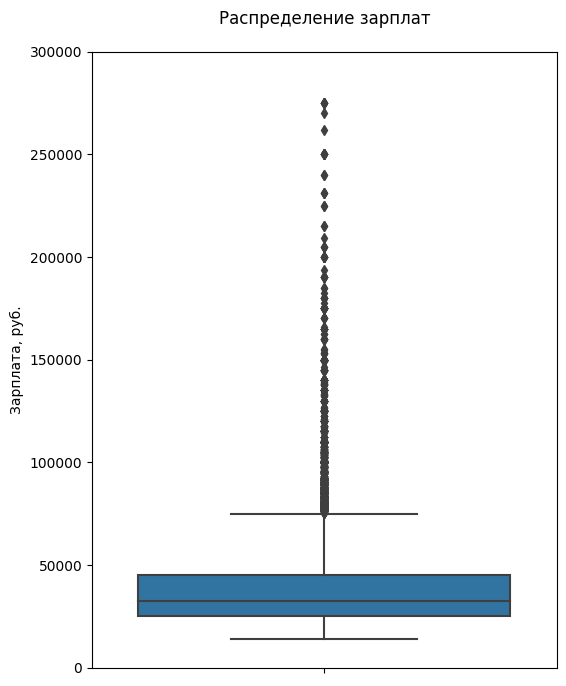

In [19]:
plt.figure(figsize=(6, 8))
y = df['salary']
sns.boxplot(y=y, orient='v')

plt.title('Распределение зарплат', pad=20)
plt.ylim(0, 300000)
plt.ylabel('Зарплата, руб.')

print("Медианная зарплата:", df['salary'].quantile(0.5))

plt.show()

In [20]:
q_min = df.salary.quantile(0.03)
q_max = df.salary.quantile(0.97)
df = df[(df['salary'] > q_min) & (df['salary'] < q_max)]

df.salary.describe().round().astype('Int64')

count    111487
mean      36050
std       13701
min       16000
25%       25000
50%       32500
75%       45000
max       77400
Name: salary, dtype: Int64

Медианная зарплата: 32500.0


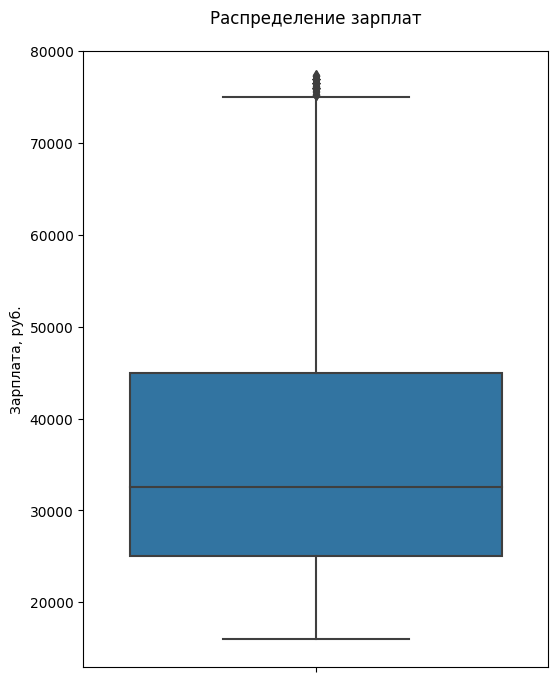

In [21]:
plt.figure(figsize=(6, 8))
y = df['salary']
sns.boxplot(y=y, orient='v')

plt.title('Распределение зарплат', pad=20)
plt.ylim(None, 80000)
plt.ylabel('Зарплата, руб.')

print("Медианная зарплата:", df['salary'].quantile(0.5))

plt.show()

Text(50.222222222222214, 0.5, '')

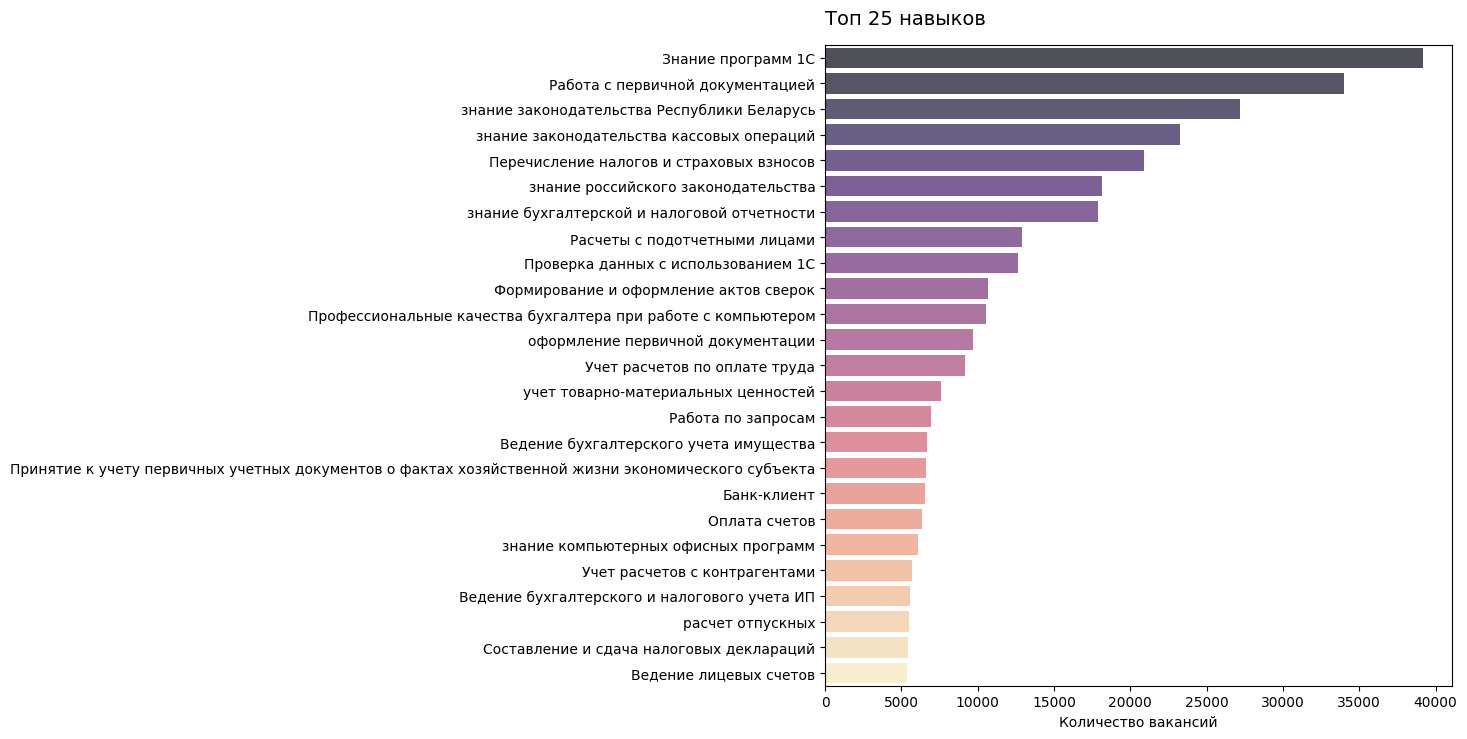

In [22]:
counts = df.iloc[:, 1:332].sum()
top = counts.sort_values(ascending=False)[:25]
fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.tight_layout(w_pad=5)

sns.barplot(ax = ax, x=top.values, y=top.index, palette=sns.color_palette('magma', 25), alpha=0.7)
ax.set_title(label='Топ 25 навыков', loc='left', size=14, pad=15)
ax.set_xlabel('Количество вакансий')
ax.set_ylabel('')

In [23]:
skills = df.columns[df.columns.get_loc('Работа с первичной документацией'):df.columns.get_loc('Работа с виртуальным складом')+1].tolist()

In [24]:
X = df.loc[:,'Работа с первичной документацией':'Работа с виртуальным складом']
y = df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
pools = {}

pools['train'] = cbt.Pool(
    data=X_train,
    label=y_train
)

pools['test'] = cbt.Pool(
    data=X_test,
    label=y_test
)

model = CatBoostRegressor(iterations = 5000, eval_metric = 'MAE')
model.fit(
    pools['train'],
    eval_set=pools['test'],
    use_best_model=True,
    plot=True,
    verbose=1000,
    early_stopping_rounds=50,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.038612
0:	learn: 11028.0368170	test: 11123.5905094	best: 11123.5905094 (0)	total: 161ms	remaining: 13m 26s
1000:	learn: 9605.4212631	test: 9860.8034766	best: 9860.8034766 (1000)	total: 13.5s	remaining: 53.8s
2000:	learn: 9372.9451557	test: 9762.5648892	best: 9762.5648892 (2000)	total: 26.4s	remaining: 39.6s
3000:	learn: 9204.7446504	test: 9708.0215022	best: 9708.0215022 (3000)	total: 40.5s	remaining: 27s
4000:	learn: 9067.1173013	test: 9665.3975777	best: 9665.3975777 (4000)	total: 55.1s	remaining: 13.7s
4999:	learn: 8948.8991349	test: 9634.3799999	best: 9634.3799999 (4999)	total: 1m 8s	remaining: 0us

bestTest = 9634.38
bestIteration = 4999



In [26]:
y_pred = model.predict(X_test)

# Вычисление метрик MAE и RMSE
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("MAPE:", mape)
print("RMSE:", rmse)
print("MAE:", mae)

MAPE: 0.29321449085275775
RMSE: 12217.240965867371
MAE: 9634.38000138618


In [27]:
#кросс-валидация
#params = {"iterations": 1000,
#          "depth": 2,
#          "loss_function": "MAE",
#          "verbose": False}
#cv_dataset = Pool(data=X_train,
#                  label=y_train)
#scores = cv(cv_dataset,
#            params,
#            fold_count=2, 
#            plot="True")

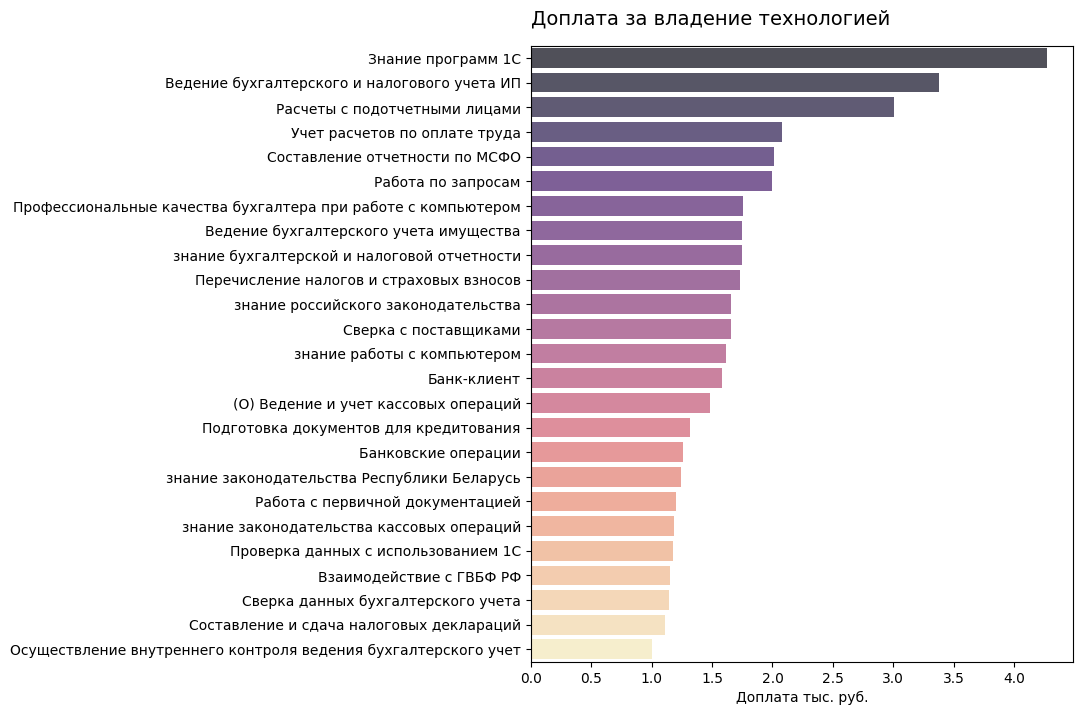

In [28]:
model_cat = pd.DataFrame([*zip(skills, model.feature_importances_[:len(skills)])], columns = ['features', 'values'])
model_cat.sort_values(by='values', ascending=False, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(7,8))
sns.barplot(data=model_cat.head(25), x='values', y='features', palette=sns.color_palette('magma', 25), 
            orient='h', alpha=0.7, ax=ax)
ax.set_title(label=f'Доплата за владение технологией', loc='left', size=14, pad=15)
ax.set_xlabel('Доплата тыс. руб.')
ax.set_ylabel('')
plt.show()

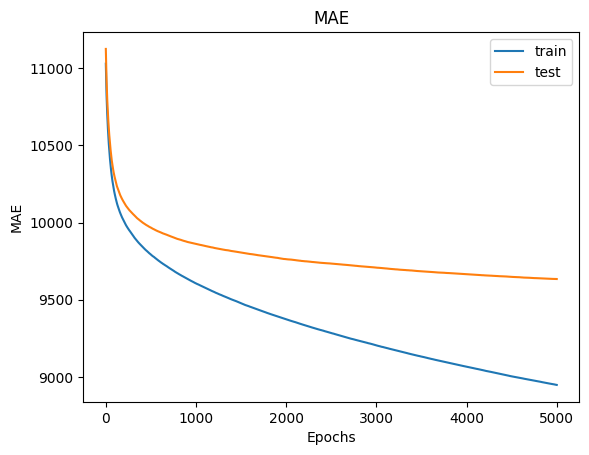

In [29]:
train_metrics = model.get_evals_result()['learn']['MAE']
valid_metrics = model.get_evals_result()['validation']['MAE']

# Построение графиков метрик
epochs = range(1, len(train_metrics) + 1)
plt.plot(epochs, train_metrics, label='train')
plt.plot(epochs, valid_metrics, label='test')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('MAE')
plt.legend()

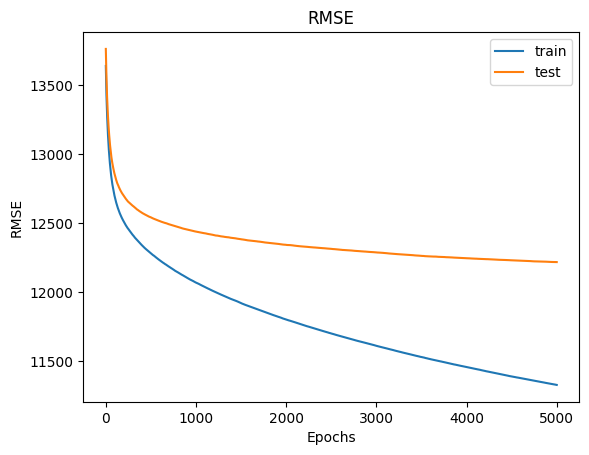

In [31]:
train_metrics = model.get_evals_result()['learn']['RMSE']
valid_metrics = model.get_evals_result()['validation']['RMSE']

# Построение графиков метрик
epochs = range(1, len(train_metrics) + 1)
plt.plot(epochs, train_metrics, label='train')
plt.plot(epochs, valid_metrics, label='test')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('RMSE')
plt.legend()
plt.show()

In [33]:
newcolumns = df.columns.str.replace(r',', '', regex=True).to_list()

df_new = pd.DataFrame(df.values, columns=newcolumns)
df_new.head()

,id,Работа с первичной документацией,Компьютерные программы для ведения бухгалтерского учета,(О) Ведение налогового учета,Принятие к учету первичных учетных документов о фактах хозяйственной жизни экономического субъекта,Проверка первичных учетных документов,(О) Архивирование документов,Организация и ведение документооборота,работа с кассовыми и банковскими документами,(О) Ведение и учет кассовых операций,Контроль и проверка кассовой дисциплины,(О) Работа кассиром,знание законодательства кассовых операций,Знание программ 1С,1С Инструменты,ведение и учет банковских операций,(О) Ведение управленческого учета,знание законодательства по бухгалтерскому учету,Знание Банк-клиент,Банк-клиент,Знание налогового законодательства,знание гражданского законодательства,Знание трудового законодательства,знание финансового законодательства,Знание налогового законодательства Республики Казахстан,знание таможенного законодательства,Знание бюджетного законодательства,знание валютного законодательства,Отслеживание изменений законодательства Республики Казахстан,Знание МСФО,Знание административного права,Знание нормативно-правовых актов,Знание законодательства в сфере ЖКХ,Знание законодательства пенсионной системы РФ,Знание основ и теории бухгалтерского учета,знание законодательства Республики Беларусь,(О) Ведение бухгалтерского учета,Ведение бухгалтерского учета нескольких юридических лиц (организаций),(О) Ведение бухгалтерского учета в бюджетной сфере,Ведение бухгалтерского и налогового учета ИП,Ведение бухгалтерского и налогового учета,(О) Контроль ведения бухгалтерского и налогового учета,Ведение бухгалтерского и налогового учета в строительной организации,знание работы с кассовым аппаратом,Работа с онлайн кассами,Составление отчетности по МСФО,Знание налогового учета,Ведение бухгалтерского и налогового учета УСН,Составление сводных учетных документов,знание и ведение бухгалтерского учета и налогообложения ВЭД,Подготовка и сдача бухгалтерской и налоговой отчетности,Итоговое обобщение фактов хозяйственной жизни,Денежное измерение объектов бухгалтерского учета,Составление и сдача налоговых деклараций,Составление отчетных калькуляций калькуляций себестоимости продукции (работ услуг),Оформление таможенных документов,Ведение синтетического и аналитического учета,Контроль дебиторской и кредиторской задолженности,Сверка с поставщиками,Ведение бухгалтерского учета имущества,расчет налогов страховых взносов,Отчетность в Пенсионный фонд России,Отчетность в ФСС РФ,Перечисление налогов и страховых взносов,Учет заработной платы,Оплата счетов,учет основных средств,Знание основных участков,Преимущества претендента на должность бухгалтер,Учетная политика организации,Проверка данных с использованием 1С,(О) Работать с программой 1С,аккуратность при работе с документами,ведение кадрового учета,Знание бухгалтерского бюджетного учета,Взаимодействие с ГВБФ РФ,Взаимодействие с налоговыми органами,(О) Взаимодействие с контролирующими органами,(О) Взаимодействие с банками,(О) Взаимодействие с контрагентами,Взаимодействие с аудиторами,Взаимодействие с поставщиками,Учет расчетов по оплате труда,Удалить работать с большим объемом информации,Учет расчетов с контрагентами,учет товарно-материальных ценностей,(О) Проведение инвентаризации,ведение бухгалтерского учета в торговле,знание 1С торговля,знание специфики ведения учета торговли,Контроль за учетом имущества и обязательств,Контроль учета и ведения реестра федерального имущества,Учет расчетов с поставщиками,пользователь программы 1 С ЗУП,знание работы с компьютером,Знание всех участков бухгалтерского учета,знание первичной бухгалтерской документации,знание бухгалтерской и налоговой отчетности,оформление первичной документации,Учет ТМЦ,Знание учета ТМЦ,Контроль учета ТМЦ,Формирование первичной документации по учету ТМЦ,Отражение в бухгалтерском учете результатов переоценки объектов,Представление бухгалтерской отчетности в уполномоченные органы,Формирование и оформление актов сверок,Выполнение поручений,Осуществление внутр

In [34]:
columns_to_convert = df_new.columns[1:334]
df_new[columns_to_convert] = df_new[columns_to_convert].astype(int)
df_new['salary'] = df_new['salary'].astype(int)
print(df_new.dtypes)

id                                                                                                    object
Работа с первичной документацией                                                                       int32
Компьютерные программы для ведения бухгалтерского учета                                                int32
(О) Ведение налогового учета                                                                           int32
Принятие к учету первичных учетных документов о фактах хозяйственной жизни экономического субъекта     int32
                                                                                                       ...  
first_pub_date_smooth                                                                                 object
v3_organizations_index                                                                                object
linked_bundles                                                                                        object
part               

In [37]:
X = df_new.loc[:,'Работа с первичной документацией':'Работа с виртуальным складом']
y = df_new['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': ['l1','rmse'],  
    'num_iterations': 5000,
    'early_stopping': 40
}
evals={}
evals_result = {}
model_lgb = LGBMRegressor()
# Обучение модели

model_lgb = lgb.train(params, train_data, evals_result=evals_result,valid_sets = [test_data, train_data],
               valid_names = ['valid', 'train'])


C:\Users\diana\AppData\Roaming\Python\Python311\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
C:\Users\diana\AppData\Roaming\Python\Python311\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 592
[LightGBM] [Info] Number of data points in the train set: 89189, number of used features: 296
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 36054.888910
[1]	train's l1: 10965.8	train's rmse: 13568.1	valid's l1: 10963.9	valid's rmse: 13553.3
Training until validation scores don't improve for 40 rounds
[2]	train's l1: 10866	train's rmse: 13454.7	valid's l1: 10867.6	valid's rmse: 13442.8
[3]	train's l1: 10780.4	train's rmse: 13360.5	valid's l1: 10782.4	valid's rmse: 13349
[4]	train's l1: 10708.7	train's rmse: 13277.2	valid's l1: 10714.7	valid's rmse: 13269.4
[5]	train's l1: 10

[114]	train's l1: 9609.9	train's rmse: 12097.3	valid's l1: 9765.3	valid's rmse: 12280.8
[115]	train's l1: 9608.15	train's rmse: 12095.3	valid's l1: 9763.97	valid's rmse: 12279.5
[116]	train's l1: 9605.38	train's rmse: 12092.7	valid's l1: 9762.59	valid's rmse: 12278.2
[117]	train's l1: 9603.29	train's rmse: 12090.5	valid's l1: 9761.61	valid's rmse: 12277.7
[118]	train's l1: 9601.68	train's rmse: 12088.7	valid's l1: 9760.93	valid's rmse: 12277.2
[119]	train's l1: 9600.02	train's rmse: 12086.6	valid's l1: 9760.21	valid's rmse: 12276.6
[120]	train's l1: 9598.23	train's rmse: 12084.7	valid's l1: 9759.14	valid's rmse: 12275.6
[121]	train's l1: 9596.39	train's rmse: 12082.7	valid's l1: 9758.68	valid's rmse: 12274.9
[122]	train's l1: 9594.51	train's rmse: 12080.5	valid's l1: 9757.23	valid's rmse: 12273.2
[123]	train's l1: 9592.59	train's rmse: 12077.9	valid's l1: 9756.48	valid's rmse: 12271.9
[124]	train's l1: 9590.85	train's rmse: 12075.9	valid's l1: 9755.72	valid's rmse: 12270.9
[125]	train'

[214]	train's l1: 9442.64	train's rmse: 11910.2	valid's l1: 9700.37	valid's rmse: 12216.1
[215]	train's l1: 9441.08	train's rmse: 11908.4	valid's l1: 9699.3	valid's rmse: 12215
[216]	train's l1: 9439.85	train's rmse: 11907.2	valid's l1: 9698.83	valid's rmse: 12214.5
[217]	train's l1: 9438.28	train's rmse: 11905.6	valid's l1: 9698.34	valid's rmse: 12214.2
[218]	train's l1: 9437.01	train's rmse: 11904.1	valid's l1: 9697.79	valid's rmse: 12213.6
[219]	train's l1: 9435.99	train's rmse: 11903	valid's l1: 9697.33	valid's rmse: 12213
[220]	train's l1: 9434.6	train's rmse: 11901.5	valid's l1: 9696.88	valid's rmse: 12212.8
[221]	train's l1: 9433.48	train's rmse: 11900.3	valid's l1: 9696.06	valid's rmse: 12212.1
[222]	train's l1: 9432.38	train's rmse: 11899.2	valid's l1: 9695.42	valid's rmse: 12211.3
[223]	train's l1: 9431	train's rmse: 11897.7	valid's l1: 9694.63	valid's rmse: 12210.5
[224]	train's l1: 9429.75	train's rmse: 11896.4	valid's l1: 9694.6	valid's rmse: 12210.2
[225]	train's l1: 9427

[327]	train's l1: 9286.81	train's rmse: 11737.7	valid's l1: 9643.24	valid's rmse: 12162.9
[328]	train's l1: 9284.95	train's rmse: 11735.7	valid's l1: 9642.22	valid's rmse: 12162
[329]	train's l1: 9282.66	train's rmse: 11733.2	valid's l1: 9641.36	valid's rmse: 12160.7
[330]	train's l1: 9281.53	train's rmse: 11731.9	valid's l1: 9640.85	valid's rmse: 12160.1
[331]	train's l1: 9279.76	train's rmse: 11729.8	valid's l1: 9640.03	valid's rmse: 12159.1
[332]	train's l1: 9278.26	train's rmse: 11728.1	valid's l1: 9639.24	valid's rmse: 12158.3
[333]	train's l1: 9277.18	train's rmse: 11727.1	valid's l1: 9638.7	valid's rmse: 12157.7
[334]	train's l1: 9275.49	train's rmse: 11725.2	valid's l1: 9638.01	valid's rmse: 12157.3
[335]	train's l1: 9274.73	train's rmse: 11724.4	valid's l1: 9637.58	valid's rmse: 12157
[336]	train's l1: 9273.67	train's rmse: 11723.4	valid's l1: 9637.2	valid's rmse: 12156.8
[337]	train's l1: 9272.25	train's rmse: 11722	valid's l1: 9636.43	valid's rmse: 12155.9
[338]	train's l1: 

[437]	train's l1: 9156.12	train's rmse: 11594	valid's l1: 9595.72	valid's rmse: 12120.1
[438]	train's l1: 9155.4	train's rmse: 11593.3	valid's l1: 9595.64	valid's rmse: 12120
[439]	train's l1: 9154.52	train's rmse: 11592.4	valid's l1: 9595.72	valid's rmse: 12120.1
[440]	train's l1: 9153.83	train's rmse: 11591.7	valid's l1: 9595.57	valid's rmse: 12119.8
[441]	train's l1: 9152.52	train's rmse: 11590.1	valid's l1: 9595.27	valid's rmse: 12119.5
[442]	train's l1: 9150.88	train's rmse: 11588.5	valid's l1: 9594.81	valid's rmse: 12119.2
[443]	train's l1: 9149.76	train's rmse: 11587.1	valid's l1: 9594.27	valid's rmse: 12118.7
[444]	train's l1: 9148.78	train's rmse: 11586.2	valid's l1: 9593.99	valid's rmse: 12118.2
[445]	train's l1: 9147.99	train's rmse: 11585.1	valid's l1: 9593.51	valid's rmse: 12117.7
[446]	train's l1: 9147.1	train's rmse: 11584.1	valid's l1: 9593.33	valid's rmse: 12117.6
[447]	train's l1: 9146.34	train's rmse: 11583.4	valid's l1: 9592.78	valid's rmse: 12117.3
[448]	train's l1

[551]	train's l1: 9039.77	train's rmse: 11466.2	valid's l1: 9557.34	valid's rmse: 12087.1
[552]	train's l1: 9038.98	train's rmse: 11465.3	valid's l1: 9557.26	valid's rmse: 12086.9
[553]	train's l1: 9037.29	train's rmse: 11463.5	valid's l1: 9556.22	valid's rmse: 12086
[554]	train's l1: 9036.13	train's rmse: 11462	valid's l1: 9555.68	valid's rmse: 12085.6
[555]	train's l1: 9035.07	train's rmse: 11460.9	valid's l1: 9555.36	valid's rmse: 12085
[556]	train's l1: 9034.51	train's rmse: 11460.2	valid's l1: 9555.25	valid's rmse: 12084.8
[557]	train's l1: 9033.22	train's rmse: 11458.9	valid's l1: 9555.53	valid's rmse: 12085
[558]	train's l1: 9032.26	train's rmse: 11457.9	valid's l1: 9554.95	valid's rmse: 12084.5
[559]	train's l1: 9031.23	train's rmse: 11456.8	valid's l1: 9554.7	valid's rmse: 12084.2
[560]	train's l1: 9030.55	train's rmse: 11456	valid's l1: 9554.53	valid's rmse: 12084.2
[561]	train's l1: 9029.67	train's rmse: 11455	valid's l1: 9554.3	valid's rmse: 12084.1
[562]	train's l1: 9028.8

[675]	train's l1: 8922.63	train's rmse: 11338.2	valid's l1: 9530.83	valid's rmse: 12064.9
[676]	train's l1: 8921.78	train's rmse: 11337.3	valid's l1: 9530.71	valid's rmse: 12065.2
[677]	train's l1: 8921.07	train's rmse: 11336.6	valid's l1: 9530.48	valid's rmse: 12065
[678]	train's l1: 8920.62	train's rmse: 11336	valid's l1: 9530.42	valid's rmse: 12065
[679]	train's l1: 8919.88	train's rmse: 11335.3	valid's l1: 9530.25	valid's rmse: 12064.9
[680]	train's l1: 8918.85	train's rmse: 11334.2	valid's l1: 9529.88	valid's rmse: 12064.5
[681]	train's l1: 8917.78	train's rmse: 11333.1	valid's l1: 9529.02	valid's rmse: 12063.9
[682]	train's l1: 8916.9	train's rmse: 11332.3	valid's l1: 9528.86	valid's rmse: 12063.9
[683]	train's l1: 8916.07	train's rmse: 11331.4	valid's l1: 9528.65	valid's rmse: 12063.7
[684]	train's l1: 8915.36	train's rmse: 11330.4	valid's l1: 9528.87	valid's rmse: 12063.9
[685]	train's l1: 8914.67	train's rmse: 11329.8	valid's l1: 9528.73	valid's rmse: 12063.9
[686]	train's l1:

[790]	train's l1: 8832.12	train's rmse: 11241.3	valid's l1: 9506.54	valid's rmse: 12044.3
[791]	train's l1: 8831.1	train's rmse: 11240.3	valid's l1: 9506.4	valid's rmse: 12044.1
[792]	train's l1: 8830.5	train's rmse: 11239.6	valid's l1: 9506.44	valid's rmse: 12044
[793]	train's l1: 8829.47	train's rmse: 11238.4	valid's l1: 9506.29	valid's rmse: 12044
[794]	train's l1: 8828.94	train's rmse: 11237.8	valid's l1: 9506.26	valid's rmse: 12044
[795]	train's l1: 8828.41	train's rmse: 11237.2	valid's l1: 9506.34	valid's rmse: 12044.1
[796]	train's l1: 8828	train's rmse: 11236.7	valid's l1: 9506.41	valid's rmse: 12044.2
[797]	train's l1: 8827.06	train's rmse: 11235.6	valid's l1: 9506.21	valid's rmse: 12043.9
[798]	train's l1: 8826.05	train's rmse: 11234.4	valid's l1: 9505.84	valid's rmse: 12043.3
[799]	train's l1: 8825.01	train's rmse: 11233.4	valid's l1: 9505.35	valid's rmse: 12042.8
[800]	train's l1: 8823.8	train's rmse: 11232.1	valid's l1: 9505.01	valid's rmse: 12042.7
[801]	train's l1: 8822.

[905]	train's l1: 8741.86	train's rmse: 11143.2	valid's l1: 9485.2	valid's rmse: 12026.6
[906]	train's l1: 8740.58	train's rmse: 11141.9	valid's l1: 9485.21	valid's rmse: 12026.8
[907]	train's l1: 8740.07	train's rmse: 11141.4	valid's l1: 9484.95	valid's rmse: 12026.5
[908]	train's l1: 8739.5	train's rmse: 11140.8	valid's l1: 9484.69	valid's rmse: 12026.5
[909]	train's l1: 8738.85	train's rmse: 11140.2	valid's l1: 9484.32	valid's rmse: 12026.2
[910]	train's l1: 8737.74	train's rmse: 11139	valid's l1: 9483.93	valid's rmse: 12025.9
[911]	train's l1: 8737.1	train's rmse: 11138.3	valid's l1: 9483.44	valid's rmse: 12025.6
[912]	train's l1: 8736.56	train's rmse: 11137.8	valid's l1: 9482.98	valid's rmse: 12025.2
[913]	train's l1: 8735.75	train's rmse: 11136.9	valid's l1: 9482.69	valid's rmse: 12025
[914]	train's l1: 8735.24	train's rmse: 11136.3	valid's l1: 9482.74	valid's rmse: 12025
[915]	train's l1: 8734.22	train's rmse: 11135.2	valid's l1: 9482.65	valid's rmse: 12025.1
[916]	train's l1: 8

[1029]	train's l1: 8658.56	train's rmse: 11053.4	valid's l1: 9468.07	valid's rmse: 12013
[1030]	train's l1: 8658.15	train's rmse: 11053	valid's l1: 9468.07	valid's rmse: 12013
[1031]	train's l1: 8657.49	train's rmse: 11052.4	valid's l1: 9467.7	valid's rmse: 12012.4
[1032]	train's l1: 8656.7	train's rmse: 11051.6	valid's l1: 9467.35	valid's rmse: 12012.1
[1033]	train's l1: 8656.14	train's rmse: 11051.1	valid's l1: 9467.52	valid's rmse: 12012.4
[1034]	train's l1: 8655.71	train's rmse: 11050.7	valid's l1: 9467.22	valid's rmse: 12012
[1035]	train's l1: 8654.78	train's rmse: 11049.6	valid's l1: 9467	valid's rmse: 12011.9
[1036]	train's l1: 8653.92	train's rmse: 11048.4	valid's l1: 9466.83	valid's rmse: 12011.6
[1037]	train's l1: 8653.15	train's rmse: 11047.6	valid's l1: 9466.54	valid's rmse: 12011.3
[1038]	train's l1: 8652.55	train's rmse: 11046.9	valid's l1: 9466.19	valid's rmse: 12011.1
[1039]	train's l1: 8651.98	train's rmse: 11046.3	valid's l1: 9465.97	valid's rmse: 12011.1
[1040]	train

[1147]	train's l1: 8581.2	train's rmse: 10969.7	valid's l1: 9453.71	valid's rmse: 12003.2
[1148]	train's l1: 8580.85	train's rmse: 10969.2	valid's l1: 9453.43	valid's rmse: 12003
[1149]	train's l1: 8580.34	train's rmse: 10968.5	valid's l1: 9453.1	valid's rmse: 12002.5
[1150]	train's l1: 8579.67	train's rmse: 10967.8	valid's l1: 9453	valid's rmse: 12002.5
[1151]	train's l1: 8578.69	train's rmse: 10966.8	valid's l1: 9452.75	valid's rmse: 12002.4
[1152]	train's l1: 8577.98	train's rmse: 10965.9	valid's l1: 9452.31	valid's rmse: 12001.7
[1153]	train's l1: 8577.74	train's rmse: 10965.6	valid's l1: 9452.56	valid's rmse: 12001.8
[1154]	train's l1: 8577.13	train's rmse: 10965	valid's l1: 9452.64	valid's rmse: 12002
[1155]	train's l1: 8576.73	train's rmse: 10964.5	valid's l1: 9452.99	valid's rmse: 12002.5
[1156]	train's l1: 8576.19	train's rmse: 10963.9	valid's l1: 9452.98	valid's rmse: 12002.5
[1157]	train's l1: 8575.64	train's rmse: 10963.1	valid's l1: 9452.77	valid's rmse: 12002.3
[1158]	tra

[1268]	train's l1: 8504.08	train's rmse: 10886.2	valid's l1: 9440.06	valid's rmse: 11995.8
[1269]	train's l1: 8503.52	train's rmse: 10885.5	valid's l1: 9439.94	valid's rmse: 11995.7
[1270]	train's l1: 8502.93	train's rmse: 10884.8	valid's l1: 9439.84	valid's rmse: 11995.6
[1271]	train's l1: 8502.05	train's rmse: 10884	valid's l1: 9439.52	valid's rmse: 11995.2
[1272]	train's l1: 8501.48	train's rmse: 10883.5	valid's l1: 9439.37	valid's rmse: 11995.1
[1273]	train's l1: 8501.18	train's rmse: 10883.2	valid's l1: 9439.43	valid's rmse: 11995.2
[1274]	train's l1: 8500.78	train's rmse: 10882.7	valid's l1: 9439.23	valid's rmse: 11995
[1275]	train's l1: 8500.36	train's rmse: 10882.2	valid's l1: 9439.23	valid's rmse: 11994.9
[1276]	train's l1: 8499.8	train's rmse: 10881.7	valid's l1: 9439.11	valid's rmse: 11994.7
[1277]	train's l1: 8498.9	train's rmse: 10880.8	valid's l1: 9439.28	valid's rmse: 11994.9
[1278]	train's l1: 8498.32	train's rmse: 10880.2	valid's l1: 9439.04	valid's rmse: 11994.8
[1279

[1382]	train's l1: 8440.97	train's rmse: 10818.8	valid's l1: 9426.15	valid's rmse: 11984.3
[1383]	train's l1: 8440.61	train's rmse: 10818.4	valid's l1: 9426.07	valid's rmse: 11984.2
[1384]	train's l1: 8440.25	train's rmse: 10817.9	valid's l1: 9425.92	valid's rmse: 11984
[1385]	train's l1: 8439.43	train's rmse: 10817.1	valid's l1: 9425.7	valid's rmse: 11983.7
[1386]	train's l1: 8438.95	train's rmse: 10816.7	valid's l1: 9425.69	valid's rmse: 11983.7
[1387]	train's l1: 8438.46	train's rmse: 10816	valid's l1: 9425.65	valid's rmse: 11983.6
[1388]	train's l1: 8438.01	train's rmse: 10815.3	valid's l1: 9425.41	valid's rmse: 11983.8
[1389]	train's l1: 8437.52	train's rmse: 10814.8	valid's l1: 9425.25	valid's rmse: 11983.7
[1390]	train's l1: 8436.86	train's rmse: 10814.1	valid's l1: 9424.97	valid's rmse: 11983.5
[1391]	train's l1: 8436.32	train's rmse: 10813.5	valid's l1: 9425.1	valid's rmse: 11983.7
[1392]	train's l1: 8435.78	train's rmse: 10813.1	valid's l1: 9424.93	valid's rmse: 11983.6
[1393

[1499]	train's l1: 8379.58	train's rmse: 10754.5	valid's l1: 9413.65	valid's rmse: 11977.4
[1500]	train's l1: 8379.34	train's rmse: 10754.2	valid's l1: 9413.72	valid's rmse: 11977.3
[1501]	train's l1: 8378.89	train's rmse: 10753.9	valid's l1: 9413.73	valid's rmse: 11977.4
[1502]	train's l1: 8378.48	train's rmse: 10753.5	valid's l1: 9413.58	valid's rmse: 11977.4
[1503]	train's l1: 8378.26	train's rmse: 10753.2	valid's l1: 9413.5	valid's rmse: 11977.3
[1504]	train's l1: 8377.72	train's rmse: 10752.5	valid's l1: 9413.43	valid's rmse: 11977.4
[1505]	train's l1: 8377.33	train's rmse: 10752	valid's l1: 9413.45	valid's rmse: 11977.4
[1506]	train's l1: 8377.1	train's rmse: 10751.7	valid's l1: 9413.2	valid's rmse: 11977
[1507]	train's l1: 8376.57	train's rmse: 10751.1	valid's l1: 9413.19	valid's rmse: 11977.2
[1508]	train's l1: 8376.07	train's rmse: 10750.6	valid's l1: 9413.08	valid's rmse: 11977.2
[1509]	train's l1: 8375.44	train's rmse: 10749.9	valid's l1: 9412.98	valid's rmse: 11977.2
[1510]

[1599]	train's l1: 8326.08	train's rmse: 10698.9	valid's l1: 9402.62	valid's rmse: 11970.3
[1600]	train's l1: 8325.68	train's rmse: 10698.4	valid's l1: 9402.67	valid's rmse: 11970.4
[1601]	train's l1: 8325.05	train's rmse: 10697.8	valid's l1: 9402.65	valid's rmse: 11970.6
[1602]	train's l1: 8324.62	train's rmse: 10697.4	valid's l1: 9402.89	valid's rmse: 11970.9
[1603]	train's l1: 8324.25	train's rmse: 10697.1	valid's l1: 9402.94	valid's rmse: 11970.9
[1604]	train's l1: 8323.77	train's rmse: 10696.6	valid's l1: 9402.83	valid's rmse: 11970.6
[1605]	train's l1: 8323.33	train's rmse: 10696.1	valid's l1: 9402.82	valid's rmse: 11970.4
[1606]	train's l1: 8322.79	train's rmse: 10695.4	valid's l1: 9402.78	valid's rmse: 11970.4
[1607]	train's l1: 8322.49	train's rmse: 10695	valid's l1: 9402.72	valid's rmse: 11970.3
[1608]	train's l1: 8322.17	train's rmse: 10694.7	valid's l1: 9402.42	valid's rmse: 11970.4
[1609]	train's l1: 8321.64	train's rmse: 10694.2	valid's l1: 9402.3	valid's rmse: 11970.2
[1

[1711]	train's l1: 8272.73	train's rmse: 10641.8	valid's l1: 9395.31	valid's rmse: 11968.4
[1712]	train's l1: 8272.32	train's rmse: 10641.2	valid's l1: 9395.37	valid's rmse: 11968.4
[1713]	train's l1: 8272.01	train's rmse: 10640.9	valid's l1: 9395.23	valid's rmse: 11968.2
[1714]	train's l1: 8271.56	train's rmse: 10640.5	valid's l1: 9394.91	valid's rmse: 11967.9
[1715]	train's l1: 8271.02	train's rmse: 10639.9	valid's l1: 9394.52	valid's rmse: 11967.6
[1716]	train's l1: 8270.67	train's rmse: 10639.6	valid's l1: 9394.27	valid's rmse: 11967.5
[1717]	train's l1: 8270.35	train's rmse: 10639.2	valid's l1: 9394.24	valid's rmse: 11967.5
[1718]	train's l1: 8270.01	train's rmse: 10638.8	valid's l1: 9394.07	valid's rmse: 11967.5
[1719]	train's l1: 8269.74	train's rmse: 10638.5	valid's l1: 9394.13	valid's rmse: 11967.4
[1720]	train's l1: 8269.31	train's rmse: 10638	valid's l1: 9394.19	valid's rmse: 11967.5
[1721]	train's l1: 8268.91	train's rmse: 10637.6	valid's l1: 9394.1	valid's rmse: 11967.3
[1

[1811]	train's l1: 8229.4	train's rmse: 10595.5	valid's l1: 9388.07	valid's rmse: 11962.1
[1812]	train's l1: 8228.86	train's rmse: 10594.8	valid's l1: 9387.98	valid's rmse: 11962
[1813]	train's l1: 8228.45	train's rmse: 10594.4	valid's l1: 9387.81	valid's rmse: 11961.8
[1814]	train's l1: 8228.26	train's rmse: 10594.1	valid's l1: 9387.91	valid's rmse: 11961.8
[1815]	train's l1: 8227.8	train's rmse: 10593.8	valid's l1: 9387.85	valid's rmse: 11961.9
[1816]	train's l1: 8227.46	train's rmse: 10593.4	valid's l1: 9387.64	valid's rmse: 11961.7
[1817]	train's l1: 8226.92	train's rmse: 10592.9	valid's l1: 9387.67	valid's rmse: 11961.9
[1818]	train's l1: 8226.56	train's rmse: 10592.5	valid's l1: 9387.67	valid's rmse: 11961.9
[1819]	train's l1: 8225.99	train's rmse: 10591.9	valid's l1: 9387.95	valid's rmse: 11962.2
[1820]	train's l1: 8225.38	train's rmse: 10591.3	valid's l1: 9387.84	valid's rmse: 11962.4
[1821]	train's l1: 8224.94	train's rmse: 10590.9	valid's l1: 9387.88	valid's rmse: 11962.5
[18

[1925]	train's l1: 8176.05	train's rmse: 10540.1	valid's l1: 9378.17	valid's rmse: 11956.8
[1926]	train's l1: 8175.78	train's rmse: 10539.8	valid's l1: 9378.18	valid's rmse: 11956.7
[1927]	train's l1: 8175.21	train's rmse: 10539.2	valid's l1: 9377.99	valid's rmse: 11956.8
[1928]	train's l1: 8174.57	train's rmse: 10538.5	valid's l1: 9378.04	valid's rmse: 11956.9
[1929]	train's l1: 8174.22	train's rmse: 10538.1	valid's l1: 9377.99	valid's rmse: 11956.9
[1930]	train's l1: 8173.52	train's rmse: 10537.4	valid's l1: 9378.01	valid's rmse: 11956.9
[1931]	train's l1: 8173.23	train's rmse: 10537.1	valid's l1: 9377.99	valid's rmse: 11956.9
[1932]	train's l1: 8172.58	train's rmse: 10536.3	valid's l1: 9377.72	valid's rmse: 11956.7
[1933]	train's l1: 8172.09	train's rmse: 10535.9	valid's l1: 9377.6	valid's rmse: 11956.7
[1934]	train's l1: 8171.63	train's rmse: 10535.3	valid's l1: 9377.48	valid's rmse: 11956.5
[1935]	train's l1: 8171.04	train's rmse: 10534.7	valid's l1: 9377.63	valid's rmse: 11956.7


[2045]	train's l1: 8122.89	train's rmse: 10484.7	valid's l1: 9370.33	valid's rmse: 11951.9
[2046]	train's l1: 8122.33	train's rmse: 10484.2	valid's l1: 9369.98	valid's rmse: 11951.6
[2047]	train's l1: 8122.07	train's rmse: 10483.9	valid's l1: 9370.02	valid's rmse: 11951.5
[2048]	train's l1: 8121.76	train's rmse: 10483.5	valid's l1: 9369.87	valid's rmse: 11951.3
[2049]	train's l1: 8121.26	train's rmse: 10483	valid's l1: 9369.84	valid's rmse: 11951.3
[2050]	train's l1: 8120.72	train's rmse: 10482.4	valid's l1: 9369.54	valid's rmse: 11951
[2051]	train's l1: 8120.44	train's rmse: 10482.1	valid's l1: 9369.44	valid's rmse: 11951.1
[2052]	train's l1: 8120.03	train's rmse: 10481.6	valid's l1: 9369.19	valid's rmse: 11950.8
[2053]	train's l1: 8119.63	train's rmse: 10481.2	valid's l1: 9369.09	valid's rmse: 11950.6
[2054]	train's l1: 8119.33	train's rmse: 10480.9	valid's l1: 9369.08	valid's rmse: 11950.5
[2055]	train's l1: 8119.11	train's rmse: 10480.7	valid's l1: 9369.09	valid's rmse: 11950.6
[20

[2166]	train's l1: 8072.25	train's rmse: 10432.3	valid's l1: 9359.19	valid's rmse: 11945.2
[2167]	train's l1: 8071.83	train's rmse: 10431.9	valid's l1: 9359.32	valid's rmse: 11945.2
[2168]	train's l1: 8071.31	train's rmse: 10431.4	valid's l1: 9359.21	valid's rmse: 11945.1
[2169]	train's l1: 8070.87	train's rmse: 10431	valid's l1: 9359.02	valid's rmse: 11944.9
[2170]	train's l1: 8070.43	train's rmse: 10430.5	valid's l1: 9358.79	valid's rmse: 11944.7
[2171]	train's l1: 8069.91	train's rmse: 10430	valid's l1: 9358.84	valid's rmse: 11944.8
[2172]	train's l1: 8069.44	train's rmse: 10429.5	valid's l1: 9358.98	valid's rmse: 11944.7
[2173]	train's l1: 8069.13	train's rmse: 10429.2	valid's l1: 9358.91	valid's rmse: 11944.6
[2174]	train's l1: 8068.55	train's rmse: 10428.5	valid's l1: 9358.84	valid's rmse: 11944.6
[2175]	train's l1: 8068.11	train's rmse: 10428.2	valid's l1: 9358.68	valid's rmse: 11944.6
[2176]	train's l1: 8067.87	train's rmse: 10428	valid's l1: 9358.62	valid's rmse: 11944.5
[2177

In [38]:
# Прогнозирование на тестовых данных
y_pred = model_lgb.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("MAPE:", mape)

MAE: 9356.192437427668
RMSE: 142643010.46072224
MAPE: 0.283970581823425


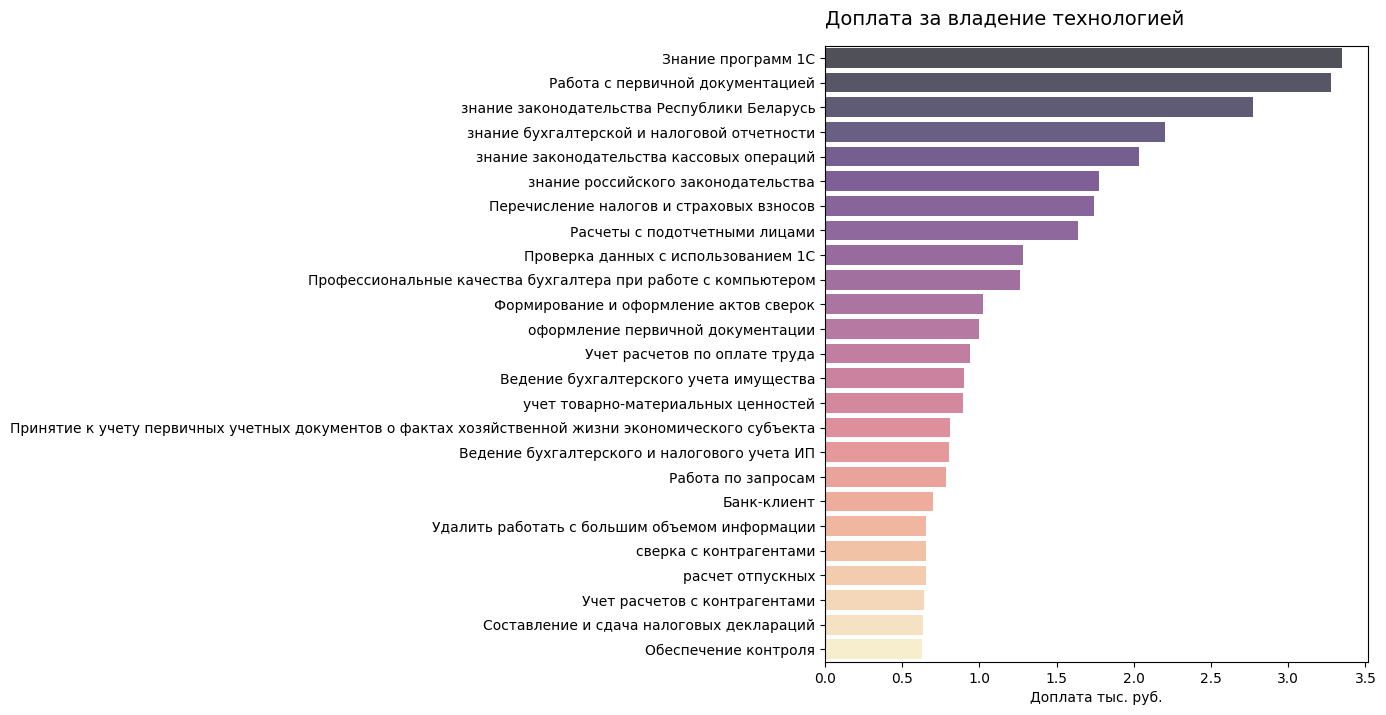

In [39]:
features=model_lgb.feature_importance().tolist()
features = [value / 1000 for value in features]

df_lgb = pd.DataFrame([*zip(skills, features[:len(skills)])], columns = ['features', 'values'])
df_lgb.sort_values(by='values', ascending=False, inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(7,8))
sns.barplot(data=df_lgb.head(25), x='values', y='features', palette=sns.color_palette('magma', 25), 
            orient='h', alpha=0.7, ax=ax)
ax.set_title(label=f'Доплата за владение технологией', loc='left', size=14, pad=15)
ax.set_xlabel('Доплата тыс. руб.')
ax.set_ylabel('')
plt.show()

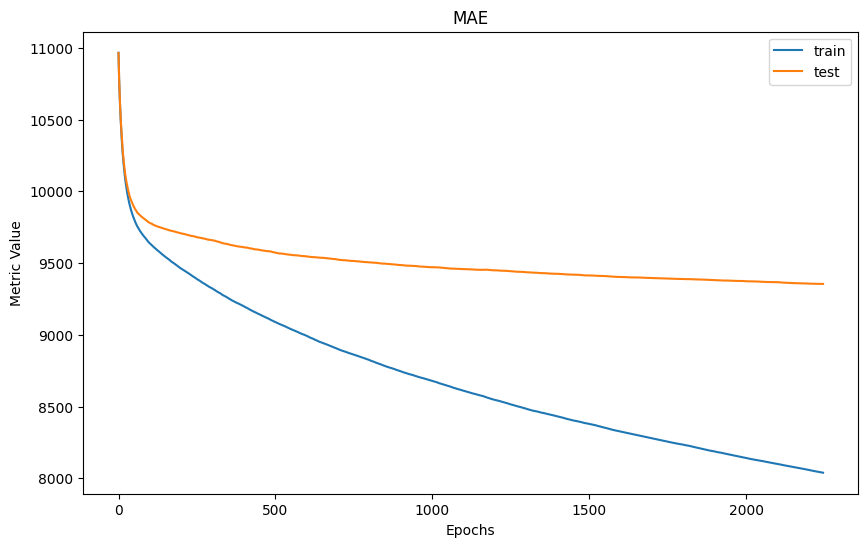

In [40]:
train_metrics = evals_result['train']['l1']
valid_metrics = evals_result['valid']['l1']

epochs = np.arange(len(train_metrics))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_metrics, label='train')
plt.plot(epochs, valid_metrics, label='test')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('MAE')
plt.legend()
plt.show()

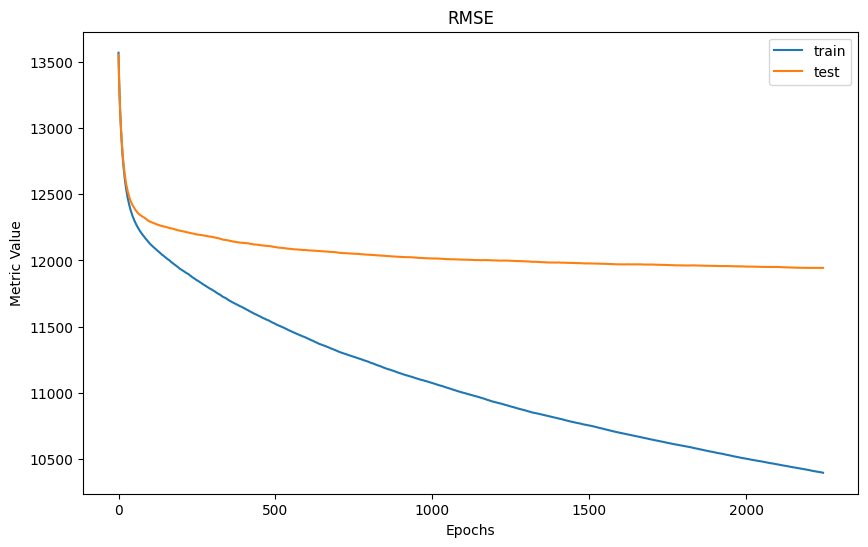

In [41]:
train_metrics = evals_result['train']['rmse']
valid_metrics = evals_result['valid']['rmse']

epochs = np.arange(len(train_metrics))

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_metrics, label='train')
plt.plot(epochs, valid_metrics, label='test')
plt.xlabel('Epochs')
plt.ylabel('Metric Value')
plt.title('RMSE')
plt.legend()
plt.show()